In [4]:
from IPython.display import Image


# Exam of Bayesian Machine Learning:
# Comparison between Supervised Learning with Quantum-Inspired Tensor Network, SVM and Naive Based

## Luca Calderaro, Marco Avesani

### 18/07/2017

# Tensor Network Notation



Tensors are a generalisation of vectors and matrices.
In tensor network notation (TNN) a single tensor is simply represented by a geometric shape with legs sticking out of it, each corresponding to an index.

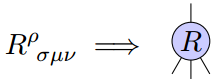

In [5]:
Image(filename='images/Tensor0.png')

The main advantage in TNN comes in representing tensors that are themselves composed of several other tensors.

### Tensor product

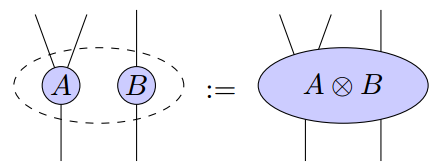

In [7]:
Image(filename='images/TNN0.png')

### Trace

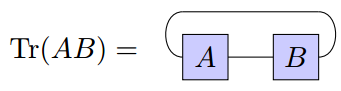

In [9]:
Image(filename='images/Trace.png')

### Contraction

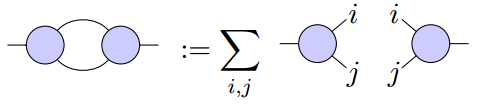

In [10]:
Image(filename='images/Contraction.png')

# Matrix Product States

Matrix product states (MPS) are a natural choice for efficient representation of 1D quantum low
energy states of physically realistic systems. 

In [27]:
%%latex
$|\psi> = \sum_{j_1 ... j_N} C_{j_1 ... j_N} |j_1> \dotsb |j_N>$

<IPython.core.display.Latex object>

The state is completely specified by knowledge of the rank-N tensor C.
MPS consists of approximating the above state as a contraction of N tensors of rank 1. This is achieved with the following steps:

Schmidt decomposition to split the tensor into two parts

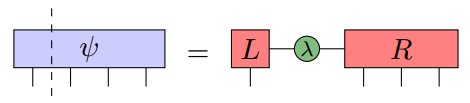

In [28]:
Image(filename='images/Schmidt.png')

With successive singular value decompositions

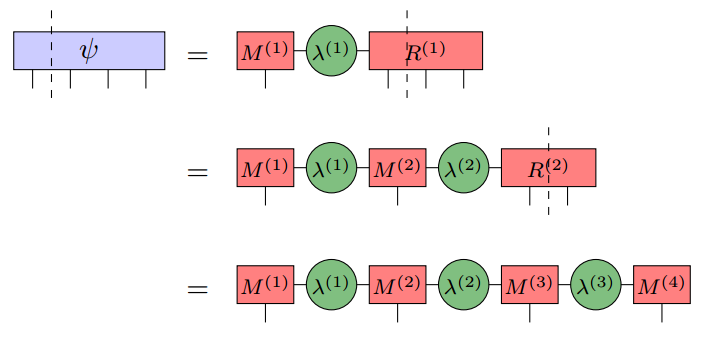

In [29]:
Image(filename='images/SuccessiveSchmidt.png')

We obtain the MPS by contracting the singular values tensors $\lambda$ into the local tensors $M$

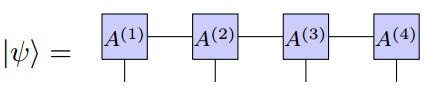

In [30]:
Image(filename='images/MPS.png')

Suppose that only D of the Schmidt weights were non-zero or "close to zero". 
Then we can use the MPS form to take advantage of this by truncating the $\lambda$ matrix. There are many relevant states for which this guarantee good approximation.

# Supervised Learning with Quantum-Inspired Tensor Networks

We have a set of very large vectors $\mathbf{x}$, that are classified by a decision function

In [32]:
%%latex
$f(\mathbf{x}) = W \cdot \Phi(\mathbf{x})$

<IPython.core.display.Latex object>

The feature vector $\Phi(\mathbf{x})$ maps the input vectors $\mathbf{x}$ into a higher dimensional space.
The training consists of finding the optimal weight vector $W$, which can be a difficult task since $W$ can be exponentially large. 
In https://arxiv.org/pdf/1605.05775.pdf the authors find that the optimal weight vector can be approximated as a tensor network. Their approach have the following consequences:
Training the model scales linearly in the training set size.
Tensor networks are also adaptive: dimensions of tensor indices internal to the network grow and shrink during training to concentrate resources on the particular correlations within the data most useful for learning.

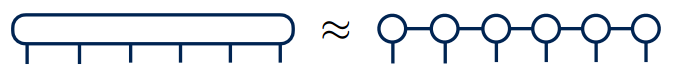

In [31]:
Image(filename='images/WeightTensor.png')

## The feature map

Choose a feature map of the form

In [38]:
%%latex
$\Phi^{s_1 \dotsc s_N}(\mathbf{x}) = \phi^{s_1}(x_1) \otimes \dotsb \otimes \phi^{s_N}(x_N)$

<IPython.core.display.Latex object>

being $\phi^{s_i}(x_i)$ the local feature map and the indices $s_i$ run from $1$ to $d$.
A simple choice

In [41]:
%%latex
$\phi^{s_i}(x_i) = [\cos(\frac{\pi}{2}x_i), \sin(\frac{\pi}{2}x_i)]$

<IPython.core.display.Latex object>

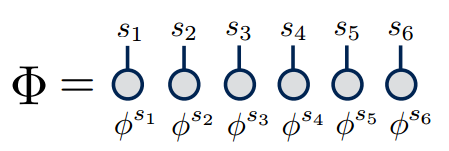

In [39]:
Image(filename='images/FeatureMap.png')

## Multiple label classification

Define a set of decision functions labeled by a index $l$

In [43]:
%%latex
$f^l(\mathbf{x}) = W^l \cdot \Phi(\mathbf{x})$

<IPython.core.display.Latex object>

The input $\mathbf{x}$ is classified by choosing the label $l$ for which $|f^l(\mathbf{x})|$ is largest. $W^l$ is a tensor of order N+1.

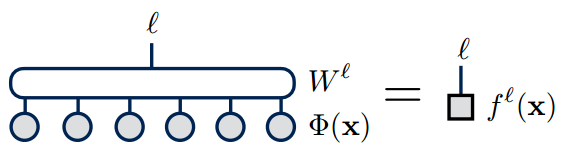

In [42]:
Image(filename='images/MultipleDecisionFunction.png')

## MPS approximation